In [1]:
import numpy as np
import pandas as pd
import time

# 象山美院小区数据
csv = pd.read_csv('../resource/测试数据4.csv')

# 将时间戳转换为时间格式，并化为分钟级时间
index = csv.get('MRO_TS')
index
for i in range(len(csv)):
    index[i] = time.strftime("%Y-%m-%d %H:%M", time.localtime(index[i]))

# 删除整列NaN
for i in csv.columns:
    count = 0
    for j in range(len(csv)):
        if pd.isnull(csv.loc[j, i]):
            count += 1
            # csv.loc[j, i] = 0 # 使用非空值填充空值
    if count == len(csv):
        csv.drop(labels=i, axis=1, inplace=True)

csv = csv[:][pd.isna(csv['OPT_LON']) == False]
csv = csv[:][pd.isna(csv['OPT_LAT']) == False]
csv = csv[:][pd.isna(csv['IMSI']) == False]
csv = csv[:][pd.isna(csv['MRO_TS']) == False]
csv = csv[:][pd.isna(csv['S_CELL_ID']) == False]

# 去除重复行
csv = csv.drop_duplicates()
csv

C:\Users\mapple\AppData\Local\Temp\ipykernel_8964\2497297259.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index[i] = time.strftime("%Y-%m-%d %H:%M", time.localtime(index[i]))


,id,N1_CELL_ID,N1_RSRP,N2_CELL_ID,N2_RSRP,N3_CELL_ID,N3_RSRP,N4_CELL_ID,N4_RSRP,N5_CELL_ID,...,MROID,S_RSRP,MRO_TS,IMSI,MSISDN,OPT_LON,OPT_LAT,PLANID,CT,DS
0,0,189874946,-79,189874945.0,-80.0,NaN,NaN,NaN,NaN,NaN,...,0,-79,2022-06-16 11:57,460008730849019,13588743959-35880009189874946,120.056834,30.319819,2222,571,2022061611
1,1,189874946,-91,189874945.0,-99.0,NaN,NaN,NaN,NaN,NaN,...,0,-91,2022-06-16 11:49,460007122532721,13777582478-86836704189874946,120.056427,30.317373,2222,571,2022061611
2,2,189874946,-75,189874945.0,-87.0,NaN,NaN,NaN,NaN,NaN,...,0,-75,2022-06-16 11:56,460007134627557,13958081187-86650404189874946,120.056448,30.317631,2222,571,2022061611
3,3,189874946,-92,189874945.0,-102.0,NaN,NaN,NaN,NaN,NaN,...,0,-92,2022-06-16 11:50,460021671205807,15168438234-35633410189874946,120.056298,30.321171,2222,571,2022061611
4,4,189874946,-72,189874945.0,-79.0,NaN,NaN,NaN,NaN,NaN,...,0,-72,2022-06-16 11:49,460005811748958,13675822554-35484209189874946,120.056147,30.317631,2222,571,2022061611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,210953048,-72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-72,2022-06-16 11:49,460078622015209,18862207063-35633210210953048,120.056083,30.319229,2112,571,2022061611
9996,9996,210953048,-102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-102,2022-06-16 11:55,460026571433955,18258244932-86953104210953048,120.056362,30.318350,2112,571,2022061611
9997,9997,210953048,-97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-97,2022-06-16 11:54,460021412587487,15141245796-86724404210953048,120.055997,30.317245,2112,571,2022061611
9998,9998,210953048,-103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-103,2022-06-16 11:52,460026571433955,18258244932-86953104210953048,120.056362,30.318349,2112,571,2022061611


In [2]:
csv.reset_index(drop=True, inplace=True)
csv

,id,N1_CELL_ID,N1_RSRP,N2_CELL_ID,N2_RSRP,N3_CELL_ID,N3_RSRP,N4_CELL_ID,N4_RSRP,N5_CELL_ID,...,MROID,S_RSRP,MRO_TS,IMSI,MSISDN,OPT_LON,OPT_LAT,PLANID,CT,DS
0,0,189874946,-79,189874945.0,-80.0,NaN,NaN,NaN,NaN,NaN,...,0,-79,2022-06-16 11:57,460008730849019,13588743959-35880009189874946,120.056834,30.319819,2222,571,2022061611
1,1,189874946,-91,189874945.0,-99.0,NaN,NaN,NaN,NaN,NaN,...,0,-91,2022-06-16 11:49,460007122532721,13777582478-86836704189874946,120.056427,30.317373,2222,571,2022061611
2,2,189874946,-75,189874945.0,-87.0,NaN,NaN,NaN,NaN,NaN,...,0,-75,2022-06-16 11:56,460007134627557,13958081187-86650404189874946,120.056448,30.317631,2222,571,2022061611
3,3,189874946,-92,189874945.0,-102.0,NaN,NaN,NaN,NaN,NaN,...,0,-92,2022-06-16 11:50,460021671205807,15168438234-35633410189874946,120.056298,30.321171,2222,571,2022061611
4,4,189874946,-72,189874945.0,-79.0,NaN,NaN,NaN,NaN,NaN,...,0,-72,2022-06-16 11:49,460005811748958,13675822554-35484209189874946,120.056147,30.317631,2222,571,2022061611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9894,9995,210953048,-72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-72,2022-06-16 11:49,460078622015209,18862207063-35633210210953048,120.056083,30.319229,2112,571,2022061611
9895,9996,210953048,-102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-102,2022-06-16 11:55,460026571433955,18258244932-86953104210953048,120.056362,30.318350,2112,571,2022061611
9896,9997,210953048,-97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-97,2022-06-16 11:54,460021412587487,15141245796-86724404210953048,120.055997,30.317245,2112,571,2022061611
9897,9998,210953048,-103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-103,2022-06-16 11:52,460026571433955,18258244932-86953104210953048,120.056362,30.318349,2112,571,2022061611


In [3]:
from sklearn.preprocessing import OneHotEncoder

class LocalOneHotEncoder(object):

  def __init__(self, target_columns):
    '''
    @param: target_columns --- To perform one-hot encoding column name list. 
    '''
    self.enc = OneHotEncoder(handle_unknown='ignore')
    self.col_names = target_columns

  def fit(self, df):
    '''
    @param: df --- pandas DataFrame
    '''
    self.enc.fit(df[self.col_names].values)
    self.labels = np.array(self.enc.categories_).ravel()
    self.new_col_names = self.gen_col_names(df)

  def gen_col_names(self, df):
    '''
    @param:  df --- pandas DataFrame
    '''
    new_col_names = []
    for col in self.col_names:
      for val in df[col].unique():
        new_col_names.append("{}_{}".format(col, val))
    return new_col_names

  def transform(self, df):
     '''
     @param:  df --- pandas DataFrame
     '''
     return pd.DataFrame(data = self.enc.transform(df[self.col_names]).toarray(), 
                         columns = self.new_col_names, 
                         dtype=int) 

ONEHOT_COLUMNS = ['S_CELL_ID']
local_ohe = LocalOneHotEncoder(ONEHOT_COLUMNS)
local_ohe.fit(csv)
oht_df = local_ohe.transform(csv)
oht_df

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


,S_CELL_ID_189874946,S_CELL_ID_100879105,S_CELL_ID_210953037,S_CELL_ID_184921604,S_CELL_ID_189874945,S_CELL_ID_189874947,S_CELL_ID_202076997,S_CELL_ID_100879106,S_CELL_ID_202076996,S_CELL_ID_202076998,S_CELL_ID_210953048,S_CELL_ID_48719299,S_CELL_ID_48383937,S_CELL_ID_210953027,S_CELL_ID_101007361,S_CELL_ID_101007371
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
# t-SNE降维
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2) 
# X_tsne = tsne.fit_transform(after_onehot) 
X_tsne = tsne.fit_transform(oht_df)
X_tsne

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-34.355366 ,   6.0439878],
       [-35.02899  ,   6.1311617],
       [-35.02899  ,   6.1311617],
       ...,
       [ 33.621193 ,  -2.2545717],
       [ 33.621193 ,  -2.2545717],
       [ 32.937607 ,  -2.2476645]], dtype=float32)

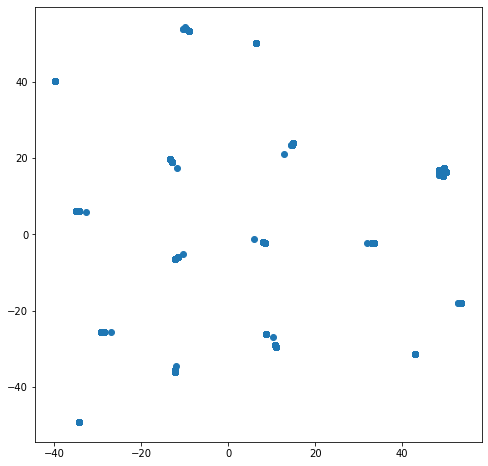

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0].T, X_tsne[:, 1].T)
plt.show()

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


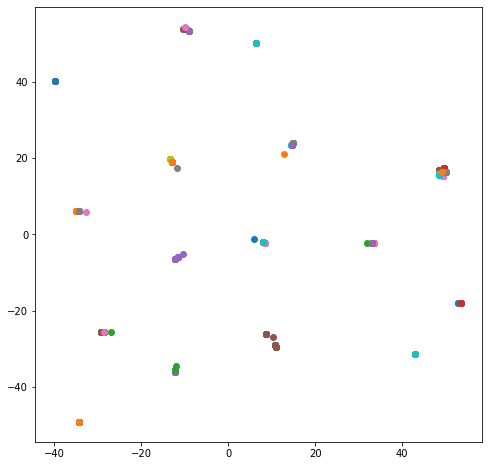

In [6]:
# 亲和力传播聚类
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot

# 定义数据集
X = X_tsne
# 定义模型
# model = AffinityPropagation(damping=0.9)
model = AffinityPropagation()
# 匹配模型
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
plt.figure(figsize=(8, 8))
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

In [7]:
from geopy.distance import geodesic
import datetime

# 时间比较函数
def compare_time(startTime, endTime):
    d_start = datetime.datetime.strptime(startTime, '%Y-%m-%d %H:%M')
    d_end = datetime.datetime.strptime(endTime, '%Y-%m-%d %H:%M')
    if d_start == d_end:
        return False
    else:
        return True

# MRO_TS时间到分钟，时间应该一致
# IMSI不一致，确保是两个不同的人
# MRO_TS1 IMSI1  MRO_TS2 IMSI2 LON1 LAT1 LON2 LAT2 category DISTANCE
# ['MRO_TS', 'IMSI', 'OPT_LON', 'OPT_LAT']
content = []
category = 0
for cluster in clusters:
    category += 1
    row_ix = where(yhat == cluster)
    for dim in range(len(row_ix)):
        for i in range(len(row_ix[dim])):
            j = i + 1
            while j < len(row_ix[dim]):
                # print(csv.loc[row_ix[dim][i], 'IMSI'], csv.loc[row_ix[dim][j], 'IMSI'], csv.loc[row_ix[dim][i], 'MRO_TS'], csv.loc[row_ix[dim][j], 'MRO_TS'])
                if row_ix[dim][i] == row_ix[dim][j]: 
                    pass
                elif csv.loc[row_ix[dim][i], 'IMSI'] == csv.loc[row_ix[dim][j], 'IMSI'] or compare_time(csv.loc[row_ix[dim][i], 'MRO_TS'], csv.loc[row_ix[dim][j], 'MRO_TS']): pass
                else:
                    distance = geodesic((csv.loc[row_ix[dim][i], 'OPT_LAT'], csv.loc[row_ix[dim][i], 'OPT_LON']), (csv.loc[row_ix[dim][j], 'OPT_LAT'], csv.loc[row_ix[dim][j], 'OPT_LON'])).m
                    content.append([csv.loc[row_ix[dim][i], 'MRO_TS'], csv.loc[row_ix[dim][i], 'IMSI'], csv.loc[row_ix[dim][j], 'MRO_TS'], csv.loc[row_ix[dim][j], 'IMSI'], csv.loc[row_ix[dim][i], 'OPT_LAT'], csv.loc[row_ix[dim][i], 'OPT_LON'], csv.loc[row_ix[dim][j], 'OPT_LAT'], csv.loc[row_ix[dim][j], 'OPT_LON'], category, distance])
                j += 1
content

[['2022-06-16 11:49',
  460007122532721,
  '2022-06-16 11:49',
  460005811748958,
  30.317373,
  120.056427,
  30.317631,
  120.056147,
  2,
  39.28417441639326],
 ['2022-06-16 11:49',
  460007122532721,
  '2022-06-16 11:49',
  460074457953409,
  30.317373,
  120.056427,
  30.316215,
  120.051813,
  2,
  461.96188086931596],
 ['2022-06-16 11:49',
  460007122532721,
  '2022-06-16 11:49',
  460006819011902,
  30.317373,
  120.056427,
  30.317502,
  120.056791,
  2,
  37.81689067871816],
 ['2022-06-16 11:49',
  460007122532721,
  '2022-06-16 11:49',
  460008062310214,
  30.317373,
  120.056427,
  30.317652,
  120.056748,
  2,
  43.70088194474822],
 ['2022-06-16 11:49',
  460007122532721,
  '2022-06-16 11:49',
  460075167112131,
  30.317373,
  120.056427,
  30.31776,
  120.056105,
  2,
  52.91190569743675],
 ['2022-06-16 11:49',
  460007122532721,
  '2022-06-16 11:49',
  460026582237673,
  30.317373,
  120.056427,
  30.317469,
  120.057156,
  2,
  70.91665812497125],
 ['2022-06-16 11:49',


In [8]:
# 数据保存
content_pandas = pd.DataFrame(content, columns=['MRO_TS1', 'IMSI1',  'MRO_TS2', 'IMSI2', 'LON1', 'LAT1', 'LON2', 'LAT2', 'category', 'DISTANCE'])
content_pandas.to_csv('../resource/MRtemp.csv')

In [9]:
# 计算统计每组人的最大距离——近似于弗雷歇算法
# select_zone = content_pandas[:][content_pandas['category'] == 1]
select_zone = content_pandas[:][:]
select_zone.sort_values(by='DISTANCE')
select_distinct = select_zone.drop_duplicates(subset=['IMSI1', 'IMSI2', 'category'], keep='first', inplace=False)
select_distinct
select_distinct.to_csv('../resource/MRdistinct.csv')

In [10]:
select_distinct_new = select_distinct[:][select_distinct['DISTANCE'] <= 250]
select_distinct_new.to_csv('../resource/MRdistinct_250.csv')